### Giới thiệu sơ lược về bài toán:

Bài toán này được đặt ra nhằm vào các mục đích và ý tưởng như sau:

- Phân tích Dữ liệu Khách hàng của Cửa hàng

- Mục tiêu của phân tích là rút ra các thông tin chi tiết nhằm giúp cửa hàng:

    - Tăng doanh số bán hàng

    - Xác định nhóm khách hàng có xu hướng mua sắm nhiều hơn

    - Phân tích này sẽ giúp cửa hàng hiểu rõ hơn về hành vi mua sắm của khách hàng và từ đó đề ra các chiến lược kinh doanh phù hợp.

### Khai báo thư viện:

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans

### Đọc bộ dữ liệu từ file csv, hiển thị dữ liệu:

In [ ]:
df = pd.read_csv('..\Customers_Analysis\data\Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


### Khám phá dữ liệu:


. Thông tin dữ liệu:

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


. Thống kê mô tả cơ bản dữ liệu định lượng:

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Age,2000.0,48.9600,28.429747,0.0,25.00,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.00,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.00,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.00,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.00,4.0,5.00,9.0


. Thống kê cơ bản về dữ liệu định tính:

In [132]:
df[['Gender', 'Profession']].describe().T

,count,unique,top,freq
Gender,2000,2,Female,1186
Profession,1965,9,Artist,612


. Vùng bộ dữ liệu:

In [133]:
df.shape

(2000, 8)

. Kiểm tra xem có giá trị nào bị thiếu trong bộ dữ liệu không:

In [134]:
df.isnull().sum() 

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Có 35 giá trị ở cột "Profession" đang bị trống.

. Xử lý bằng giá trị thiếu bằng dùng mode() để lấy giá trị phổ biến nhất trong cột "Profession":

In [135]:
df.Profession.fillna('mode', inplace=True)

. Kiểm tra lại:

In [136]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

### Trực quan hóa dữ liệu cơ bản:

. Xem phân phối của biến "Gender":

In [137]:
gender_count = df['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Phân phối giới tính trong tập dữ liệu")

# Create a bar chart to visualize the distribution of gender in the dataset 
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Display the plot
fig.show()
fig2.show()

Từ dữ liệu có thể thấy rõ rằng số lượng khách hàng nữ cao hơn đáng kể so với số lượng khách hàng nam, cho thấy nữ giới chiếm tỉ lệ cao hơn nam giới. Cụ thể, bộ dữ liệu chứa khoảng 1.200 khách hàng nữ và chỉ có khoảng 800 khách hàng nam.

Điều quan trọng cần lưu ý là sự thiên vị như vậy có thể ảnh hưởng đến hiệu suất của các mô hình học máy được đào tạo trên tập dữ liệu này. Điều này đặc biệt đúng nếu tập dữ liệu được sử dụng để dự đoán kết quả hoặc đưa ra quyết định có thể bị ảnh hưởng bởi giới tính.

. Xem phân bố độ tuổi theo giới tính:

In [138]:
age_gender_boxplot = px.box(df, x='Gender', y='Age', color='Gender', title='Phân bố độ tuổi theo giới tính')

age_gender_boxplot.show()

Biểu đồ hình hộp cung cấp những hiểu biết rõ ràng về sự phân bổ độ tuổi theo giới tính. Từ biểu đồ, có thể thấy rõ rằng giới tính dường như không có tác động đáng kể đến sự phân bổ độ tuổi. Cả giới tính nam và nữ đều có sự phân bố theo độ tuổi tương tự nhau và không có sự khác biệt đáng kể.

. Xem phân phối thu nhập hàng năm theo giới tính:

In [139]:
anual_income_gender_boxplot = px.box(df, x='Gender', y='Annual Income ($)', color='Gender', title='Phân phối thu nhập hàng năm ($) theo giới tính')

anual_income_gender_boxplot.show()

Sự phân bổ thu nhập hàng năm theo giới tính cũng tương tự như sự phân bổ theo độ tuổi và giới tính. Không có tác động đáng kể của giới tính đến thu nhập hàng năm. Và điều đó thực sự tuyệt vời khi được chứng kiến.

Sau khi thực hiện phân tích dữ liệu khám phá về đặc điểm "Giới tính", ta có thể kết luận rằng không có mối tương quan chặt chẽ giữa phân bố giới tính và bất kỳ đặc điểm nào khác. Điều này cho thấy giới tính không phải là yếu tố quan trọng khi dự đoán giá trị của các biến khác. Kết luận này rất quan trọng từ góc độ học máy vì nó ngụ ý rằng việc đưa giới tính vào như một đặc điểm trong mô hình dự đoán có thể không dẫn đến những cải thiện đáng kể về độ chính xác. Nó cũng chỉ ra rằng có thể có những yếu tố khác có ảnh hưởng nhiều hơn đến việc xác định giá trị của các biến này. Phân tích sâu hơn, chẳng hạn như tạo ma trận tương quan hoặc thực hiện kỹ thuật tính năng, có thể cần thiết để xác định các yếu tố này và cải thiện độ chính xác của mô hình của chúng em.

. Tạo biểu đồ của cột 'Age' để hiển thị sự phân bổ:

In [140]:
fig = px.histogram(df, x='Age')

fig.show()

Khi phân tích sự phân bổ độ tuổi của tập dữ liệu, ta nhận thấy rằng nó khá đồng đều trên toàn bộ độ tuổi, từ 0 đến 100. Mặc dù có một đỉnh nhỏ ở độ tuổi 30-34, hơi lệch so với phân bố bình thường, nhưng nó vẫn nằm trong phạm vi chấp nhận được. Do đó, từ góc độ thống kê, ta có thể kết luận rằng dữ liệu không bị sai lệch hoặc sai lệch về độ tuổi.

Vì vậy, sự phân bổ độ tuổi cân bằng này có thể mang lại lợi ích cho việc xây dựng các mô hình chính xác và mạnh mẽ, có thể khái quát hóa tốt các dữ liệu chưa được nhìn thấy.

. Biểu đồ phân bố độ tuổi theo nghề nghiệp:

In [141]:
fig1 = px.histogram(df, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

fig1.show()

. Biểu đồ nhiệt biểu diễn cho độ tuổi theo kinh nghiệm làm việc:

In [142]:
fig2 = px.density_heatmap(df, x='Age', y='Work Experience', title='Density Heatmap')
fig2.show()

Biểu đồ giữa độ tuổi và kinh nghiệm làm việc cho thấy một xu hướng thú vị - kinh nghiệm làm việc dường như không tăng tỷ lệ thuận với độ tuổi. Điều này không phù hợp với những gì chúng ta thường mong đợi trong thế giới thực, nơi mà kinh nghiệm làm việc thường đi kèm với tuổi tác. Có thể tập dữ liệu quá lý tưởng và không phản ánh chính xác sự phân bố trong thế giới thực. Ngoài ra, có thể có các yếu tố khác ảnh hưởng đến kinh nghiệm làm việc bất kể tuổi tác, chẳng hạn như những thay đổi trong con đường sự nghiệp hoặc trình độ học vấn.

. Biểu đồ phân phối thu nhập hàng năm:

In [143]:
px.histogram(df['Annual Income ($)'], title='Annual Income ($) Distribution')

Khi phân tích biểu đồ thu nhập hàng năm, một mô hình dễ thấy xuất hiện. Đáng chú ý, số lượng cá nhân có thu nhập từ 0 đến 50.000 là rất nhỏ. Dữ liệu cho thấy sự thay đổi đáng kể xảy ra sau mốc 50.000, trong đó số lượng tăng vọt. Xu hướng gia tăng này tiếp tục theo kiểu tuyến tính cho đến khi đạt được đạt mốc 100.000, sau đó quan sát thấy một số biến động. Những xáo trộn này kéo dài cho đến khi mức thu nhập của người dân đạt mức 190.000.

. Biểu đồ phân bố điểm chi tiêu:

In [144]:
fig = px.histogram(df, x='Spending Score (1-100)')

fig.show()

Khi kiểm tra biểu đồ của điểm chi tiêu, có thể thấy rõ rằng số lượng tần suất gần như nhất quán xuyên suốt. Tuy nhiên, tồn tại một mức cao nhất đáng chú ý về tần suất trong khoảng từ 45 đến 49 trong điểm chi tiêu. Đỉnh này thể hiện độ nghiêng dần dần. Khi chúng ta tiến về cuối biểu đồ, số tần số sẽ giảm mạnh, giảm xuống chỉ còn 18. Số tần số ban đầu đứng ở khoảng 80 và đạt đỉnh 134 trước khi giảm xuống 18, đánh dấu sự thay đổi đáng kể về số lượng. Bất chấp những biến động này, sự phân bổ vẫn duy trì một xu hướng nhất quán, dần dần dịch chuyển lên và xuống.

. Biểu tròn thể hiện phân bố số lượng nghề trong dữ liệu:

In [145]:
profession_dis = df.Profession.value_counts()
names = profession_dis.index
fig = px.pie(values=profession_dis, names=names, color=names)
fig.update_layout(title_text='Distribution of Profession Data Values')
fig.show()

Để đưa ra cái nhìn tổng quan về sự phân bổ khách hàng theo các ngành nghề trong tập dữ liệu, có thể thấy rằng khoảng 30% tổng số khách hàng được phân loại là nghệ sĩ. Các chuyên gia chăm sóc sức khỏe chiếm khoảng 17% tổng số khách hàng, khiến đây trở thành nhóm lớn thứ hai. Ngành công nghiệp giải trí theo sát với khoảng 11,7% tổng số khách hàng. Tuy nhiên, người nội trợ lại là nhóm khách hàng ít nhất, chỉ chiếm 3% tổng số khách hàng thuộc nhóm này.

Xem xét sự phân bổ của nghề nội trợ, không có gì ngạc nhiên khi thấy rằng họ có tỷ lệ thấp nhất, vì nội trợ không còn là nghề chính của phụ nữ trong xã hội hiện đại. Tuy nhiên, thật bất ngờ khi chứng kiến sự gia tăng mạnh mẽ như vậy trong nghề nghệ sĩ, vốn chiếm phần lớn khách hàng nhất với khoảng 30%. Mặc dù người ta thường tin rằng các ngành nghề kỹ thuật phổ biến hơn các nghề khác, nhưng sự chiếm ưu thế của các nghệ sĩ trong bộ dữ liệu là đáng chú ý và cho thấy tầm quan trọng ngày càng tăng của nghệ thuật và sự thể hiện sáng tạo trong xã hội hiện đại.

### Thuật toán K-Means Clustering:

Đầu tiên, giới thiệu sơ lược về phân cụm khách hàng (customer segmentation) là quá trình phân chia khách hàng dựa trên các đặc điểm chung như hành vi, thói quen mua sắm và sử dụng dịch vụ của họ,… để các công ty, doanh nghiệp có thể tiếp thị cho từng nhóm khách hàng một cách hiệu quả và phù hợp hơn. Bài báo nghiên cứu phân khúc cụm khách hàng thông qua phương pháp phân cụm K-Means (K-Means clustering methods) của một cơ sở kinh doanh. Nghiên cứu được thực hiện trên 2000 khách hàng với các đặc điểm về độ tuổi, thu nhập và điểm chi tiêu,...Kết quả nghiên cứu đã chia thành 2 cụm khách hàng mục tiêu, hứa hẹn sẽ giúp việc chăm sóc, tiếp thị khách hàng hiệu quả hơn; giúp đơn vị kinh doanh có những chiến lược marketing phù hợp giảm chi phí và tăng hiệu 
quả.

. Code công thức về thuật toán K-Means:

In [146]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
def select_optimal_k(X, max_k):
    inertias = []  # Danh sách lưu giá trị quán tính

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Vẽ biểu đồ quán tính
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('Quán tính')
    plt.title('Phương pháp Elbow để chọn số lượng cụm tối ưu')
    plt.show()

    return inertias

1a) Chọn N cụm dựa trên quán tính cho 'Age', 'Spending Score (1-100) 

(Khoảng cách bình phương giữa Centroid và điểm dữ liệu sẽ nhỏ hơn):

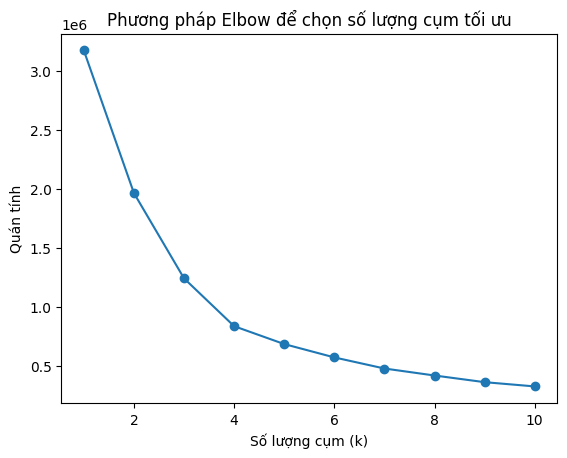

In [147]:
X = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
max_k = 10  # Số lượng cụm tối đa bạn muốn thử
inertias = select_optimal_k(X, max_k)

Dựa vào phương pháp Elbow chọn số lượng cụm tối ưu, ta có thể thấy rằng số cụm tối ưu nhất để phân bố khách hàng là 2 cụm. Đây là số cụm nên được dùng trong phương pháp này. Tuy nhiên nếu cần thì vẫn có thể phân cụm với k = 3, k = 4,...

1b) Phân cụm sử dụng "Age" và "Spending Score (1-100)":

Centers found by our algorithm:
[[54.57739791 28.99620133]
 [42.71383316 75.3875396 ]]


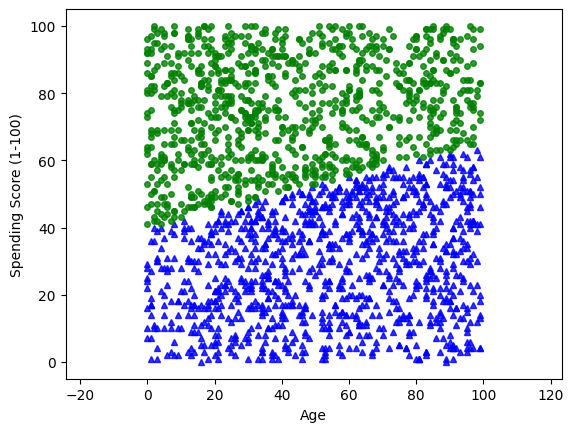

In [148]:
K = 2
interations = []
centers, labels, iterations = kmeans(X, K)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

Ở đây, ta có cụm 1 gồm độ tuổi trung bình là 42.71, điểm chi tiêu là 75.39 => Cụm 1 là nhóm khách hàng có độ tuổi ở tâm điểm cụm là 42.71 với số điểm chi tiêu là 75.39.

Cụm 2 gồm độ tuổi trung bình là 54.58, điểm chi tiêu là 29 => Cụm 2 là nhóm khách hàng có độ tuổi lớn hơn so với cụm 1 với điểm chi tiêu thấp hơn với 29.

2a) Chọn N cụm dựa trên quán tính cho Age, Annual Income and Spending Score:

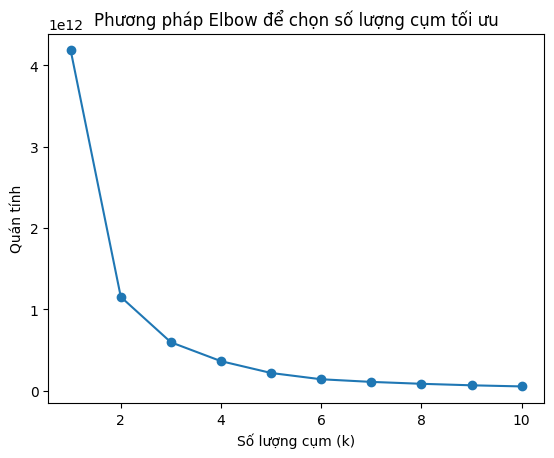

In [149]:
X2 = df[['Age', 'Spending Score (1-100)', 'Annual Income ($)']].iloc[: , :].values
max_k = 10
inertias = select_optimal_k(X2, max_k)

Dựa vào phương pháp Elbow chọn số lượng cụm tối ưu, ta có thể thấy rằng số cụm tối ưu nhất để phân bố khách hàng là 2 cụm. Đây là số cụm nên được dùng trong phương pháp này.

2b) Segmentation using Age , Annual Income and Spending Score:


Centers found by our algorithm:
[[4.92777778e+01 5.21202020e+01 1.50041482e+05]
 [4.86485149e+01 4.98277228e+01 7.22005703e+04]]


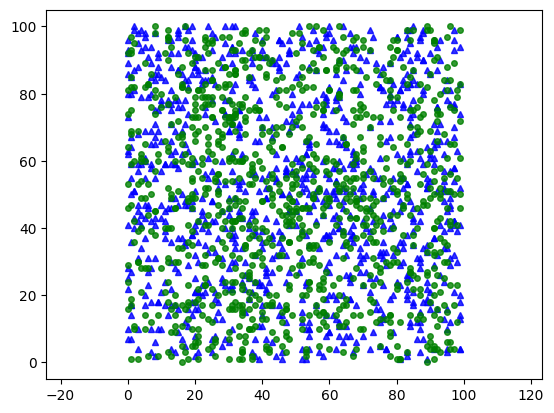

In [150]:
interations = []
K2 = 2
centers, labels, iterations = kmeans(X2, K2)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X2, labels[-1])

Ở đây, ta có cụm 1 gồm độ tuổi là 49.27, điểm chi tiêu là 52.12, thu nhập hàng năm là khoảng 150000 => Đây là cụm 1 thuộc nhóm khách hàng có điểm chi tiêu cao với nhu thập hàng năm là khá thấp.

Cụm 2 gồm độ tuổi là 48.6, điểm chi tiêu là 49.82, thu nhập hàng năm là 722000 => Đây là cụm 2 thuộc nhóm khách hàng có điểm chi tiêu thấp hơn một chút so với cụm nhưng thu nhập hàng năm thì lại cao hơn.

Thực tế tại đơn vị kinh doanh này, việc phân 
cụm khách hàng thường được phân loại thành 3 
loại: khách hàng nóng, khách hàng ấm, khách hàng 
lạnh. Nhóm nghiên cứu tiếp tục tiến hành thử
phân cụm với k=3, dù không đồng nhất với các 
phân loại của đơn vị, cũng cho công ty này cái nhìn 
tốt hơn. Như vậy, với các đặc điểm của nhóm khách 
hàng, thì việc phân cụm theo điểm chi tiêu và thu 
nhập cho doanh nghiệp thấy rõ ràng hơn cụm 
khách hàng mục tiêu, và theo thuật toán K-Means 
thì việc phân thành 2 cụm khách hàng là tối ưu.



Centers found by our algorithm:
[[4.70452261e+01 4.95745394e+01 5.64162328e+04]
 [5.09915254e+01 5.11299435e+01 1.06401804e+05]
 [4.85352518e+01 5.19841727e+01 1.61799532e+05]]


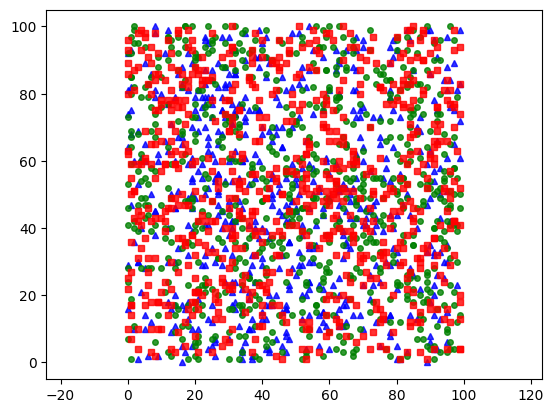

In [151]:
interations = []
K2 = 3
centers, labels, iterations = kmeans(X2, K2)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X2, labels[-1])

Kết luận: Với sự trợ giúp của việc phân cụm, chúng ta có 
thể hiểu các thông tin khách hàng tốt hơn nhiều, 
giúp bộ phận chăm sóc khách hàng đưa ra quyết 
định cẩn thận. Ngoài ra, với việc xác định khách 
hàng, các công ty có thể đưa ra các sản phẩm và 
dịch vụ nhằm mục tiêu khách hàng dựa trên một 
số thông số như thu nhập, tuổi tác, mô hình chi 
tiêu,... 
Tuy nhiên, việc phân cụm theo thuật toán K-Means cần xác định rõ số lượng cụm cần phân bố
ngay từ ban đầu, đây cũng gây khó khăn khi thực 
hiện phương pháp này.
Bên cạnh đó, nghiên cứu sẽ đầy đủ hơn nếu 
được thu thập các thông tin về hành vi, thói quen 
và sở thích của khách hàng.

# Thuật toán ID3: 

. Code thuật toán về Descion Tree (ID3):

In [152]:
def calculate_entropy(y):
    # Tính toán entropi của tập dữ liệu y
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, feature):
    # Tính toán thông tin lượng khi chia dữ liệu bằng thuộc tính feature
    unique_values = np.unique(X[feature])
    entropy_total = calculate_entropy(y)
    weighted_entropy = 0

    for value in unique_values:
        subset_indices = X[feature] == value
        subset_y = y[subset_indices]
        weight = len(subset_y) / len(y)
        weighted_entropy += weight * calculate_entropy(subset_y)

    information_gain = entropy_total - weighted_entropy
    return information_gain

def id3(X, y, features):
    if len(np.unique(y)) == 1:
        # Nếu tất cả các nhãn đều thuộc cùng một lớp, trả về nút lá với nhãn đó
        return y.iloc[0]
    elif len(features) == 0:
        # Nếu không còn thuộc tính nào để phân chia, trả về nhãn có tần suất cao nhất
        return y.value_counts().idxmax()
    else:
        # Chọn thuộc tính tốt nhất để phân chia
        information_gains = [calculate_information_gain(X, y, feature) for feature in features]
        best_feature = features[np.argmax(information_gains)]

        # Tạo nút quyết định với thuộc tính tốt nhất
        tree = {best_feature: {}}
        remaining_features = [feature for feature in features if feature != best_feature]

        for value in np.unique(X[best_feature]):
            subset_indices = X[best_feature] == value
            subset_X = X[subset_indices]
            subset_y = y[subset_indices]

            if len(subset_y) == 0:
                tree[best_feature][value] = y.value_counts().idxmax()  # Trường hợp dữ liệu trống
            else:
                tree[best_feature][value] = id3(subset_X, subset_y, remaining_features)

        return tree
    
def print_decision_tree(tree, level=0, prefix="Root: "):
    for key, value in tree.items():
        print("  " * (level) + prefix + str(key))
        if isinstance(value, dict):
            print_decision_tree(value, level + 1, prefix="Feature " + str(key) + ": ")
        else:
            print("  " * (level + 1) + "Class: " + str(value))
            
def calculate_accuracy(tree, X, y):
    correct_predictions = 0
    for _, row in X.iterrows():
        node = tree
        while isinstance(node, dict):
            feature = list(node.keys())[0]
            value = row[feature]
            node = node[feature][value]
        if node == y.iloc[_]:
            correct_predictions += 1

    accuracy = correct_predictions / len(y)
    return accuracy

. Tìm entropy H(S), tính entropy tại mỗi thuộc tính H(x, S), tính information gain G(x, S) và hiển thị thuộc tính tốt nhất để làm root gốc cho cây quyết định:

In [153]:
X = df[['Age', 'Annual Income ($)']]
y = df['Spending Score (1-100)']  

features = list(X.columns)

In [154]:
# Tính toán entropy tại root node H(S): 
entropy = calculate_entropy(y)
print(f"Entropy tại root node trong dataset là: {entropy}\n")

# Tính entropy và information gain cho từng thuộc tính H(x, S) và G(x, S):
for feature in features:
    information_gain = calculate_information_gain(X, y, feature)
    print(f"Feature: {feature}")
    print(f"Information Gain: {information_gain}\n")
    
# Chọn thuộc tính tốt nhất x* để làm root node):
best_feature_index = np.argmax([calculate_information_gain(X, y, feature) for feature in features])
best_feature = features[best_feature_index]
print(f"Thuộc tính tốt nhất để làm root: {best_feature}")

Entropy tại root node trong dataset là: 6.605870457332752

Feature: Age
Information Gain: 2.427108995364744



Feature: Annual Income ($)
Information Gain: 6.325990621944705

Thuộc tính tốt nhất để làm root: Annual Income ($)


In [155]:
decision_tree = id3(X, y, features)
print(decision_tree)

accuracy = calculate_accuracy(decision_tree, X, y)
print(f"Accuracy: {round(accuracy, 5)*100}%")

{'Annual Income ($)': {0: {'Age': {23: 96, 32: 63}}, 1000: 76, 2000: {'Age': {19: 46, 47: 47}}, 3000: {'Age': {24: 65, 43: 50, 78: 14}}, 4000: {'Age': {25: 73, 28: 75, 32: 74, 40: 95, 49: 48, 53: 20}}, 5000: 91, 6000: 91, 7000: {'Age': {32: 16, 67: 14, 84: 28}}, 8000: {'Age': {34: 76, 47: 16, 69: 46}}, 9000: {'Age': {16: 88, 18: 59, 36: 26, 47: 42, 56: 35, 63: 43, 91: 96}}, 10000: {'Age': {27: 89, 60: 56, 63: 52}}, 11000: {'Age': {46: 15, 55: 58}}, 12000: {'Age': {1: 82, 23: 29, 86: 70}}, 13000: {'Age': {64: 38, 66: 48, 68: 43}}, 14000: {'Age': {42: 17, 54: 24}}, 15000: {'Age': {19: 39, 35: 72, 48: 7}}, 16000: 1, 17000: 20, 18000: {'Age': {37: 57, 40: 31, 50: 45, 67: 88}}, 19000: {'Age': {37: 13, 93: 58}}, 20000: {'Age': {23: 87, 52: 29, 79: 40, 80: 93}}, 22000: {'Age': {0: 92, 19: 10, 48: 36}}, 23000: 8, 24000: {'Age': {21: 57, 32: 42}}, 25000: {'Age': {19: 54, 31: 42, 65: 35}}, 26000: {'Age': {26: 60, 28: 97, 39: 75}}, 27000: {'Age': {9: 62, 46: 32}}, 28000: {'Age': {30: 86, 40: 68}}

Ta có thể thấy mô hình có tỉ lệ chính xác tới 99.85%, vì vậy mô hình này có kết quả rất tích cực với độ tin cậy rất cao.

In [157]:
df1 = pd.read_csv('weather.csv')
X_1 = df1[['outlook','temperature','humidity','wind']]
y1 = df1['play']  
features1 = list(X_1.columns)

entropy = calculate_entropy(y1)
print(f"Entropy tại root node trong dataset là: {entropy}\n")

# Tính entropy và information gain cho từng thuộc tính
for feature in features1:
    information_gain = calculate_information_gain(X_1, y1, feature)
    print(f"Feature: {feature}")
    print(f"Information Gain: {information_gain}\n")
    
# Chọn thuộc tính tốt nhất H(x, S):
best_feature_index = np.argmax([calculate_information_gain(X_1, y1, feature) for feature in features1])
best_feature = features[best_feature_index]
print(f"Thuộc tính tốt nhất để làm root: {best_feature}\n")
    
decision_tree = id3(X_1, y1, features1)
print(decision_tree)

accuracy = calculate_accuracy(decision_tree, X_1, y1)
print(f"Accuracy: {round(accuracy, 5)*100}%")

Entropy tại root node trong dataset là: 0.9402859586706311

Feature: outlook
Information Gain: 0.24674981977443933

Feature: temperature
Information Gain: 0.02922256565895487

Feature: humidity
Information Gain: 0.15183550136234159

Feature: wind
Information Gain: 0.04812703040826949

Thuộc tính tốt nhất để làm root: Age

{'outlook': {'overcast': 'yes', 'rainy': {'wind': {'strong': 'no', 'weak': 'yes'}}, 'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}
Accuracy: 100.0%
